In [ ]:
# Import necessary libraries for data manipulation, visualization, preprocessing, modeling, and evaluation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

# For saving and loading models
import joblib

In [ ]:
# Load the dataset into pandas DataFrames
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
# Basic Data Understanding
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


<Axes: ylabel='count'>

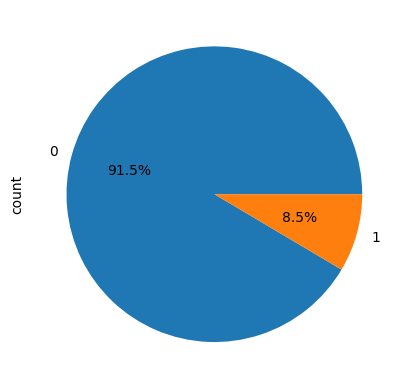

In [ ]:
#Target Variable Analysis (Class Imbalance)
train.is_promoted.value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='age', ylabel='previous_year_rating'>

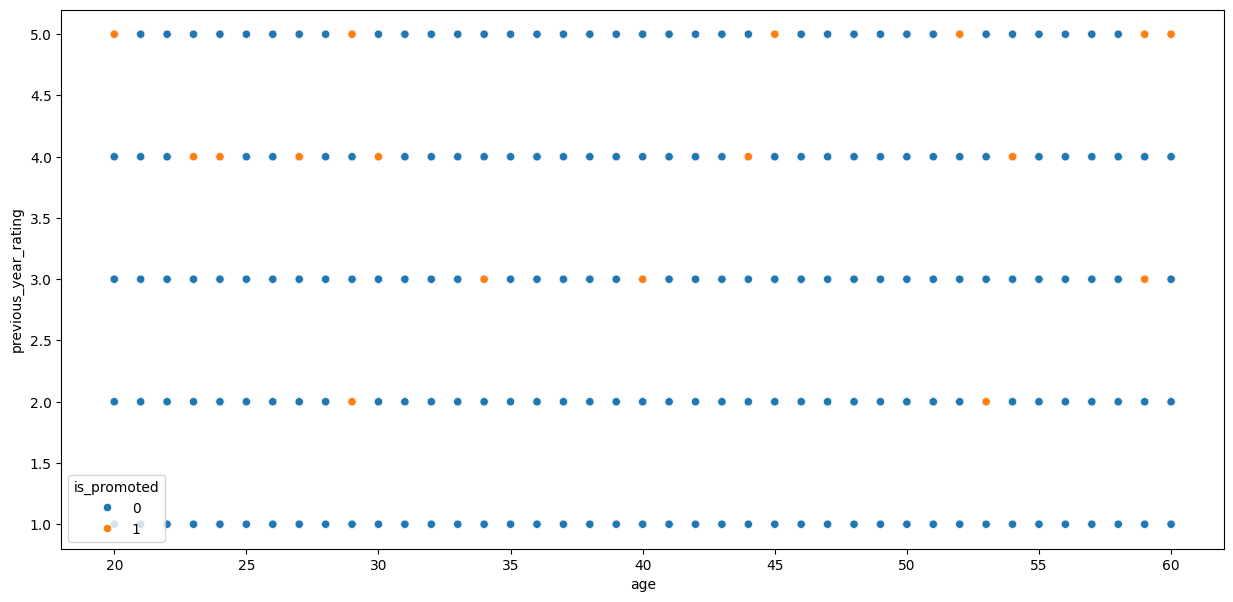

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'age', y = 'previous_year_rating',data = train, hue = 'is_promoted')

<Axes: xlabel='length_of_service', ylabel='KPIs_met >80%'>

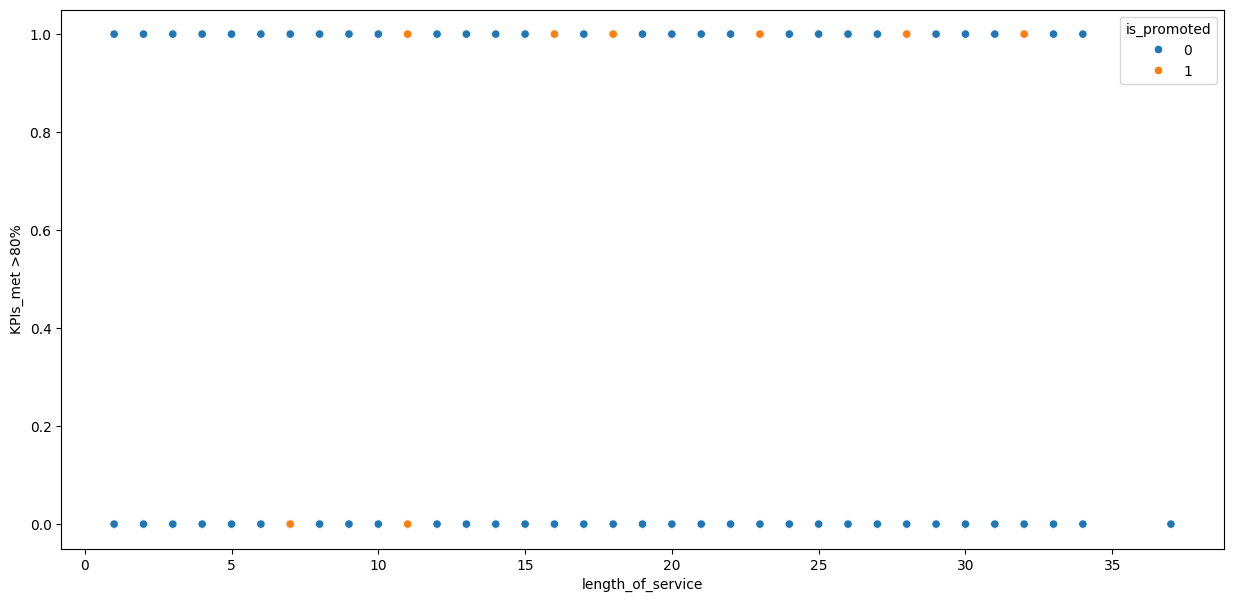

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'length_of_service', y = 'KPIs_met >80%',data = train, hue = 'is_promoted')

<Axes: xlabel='awards_won?', ylabel='avg_training_score'>

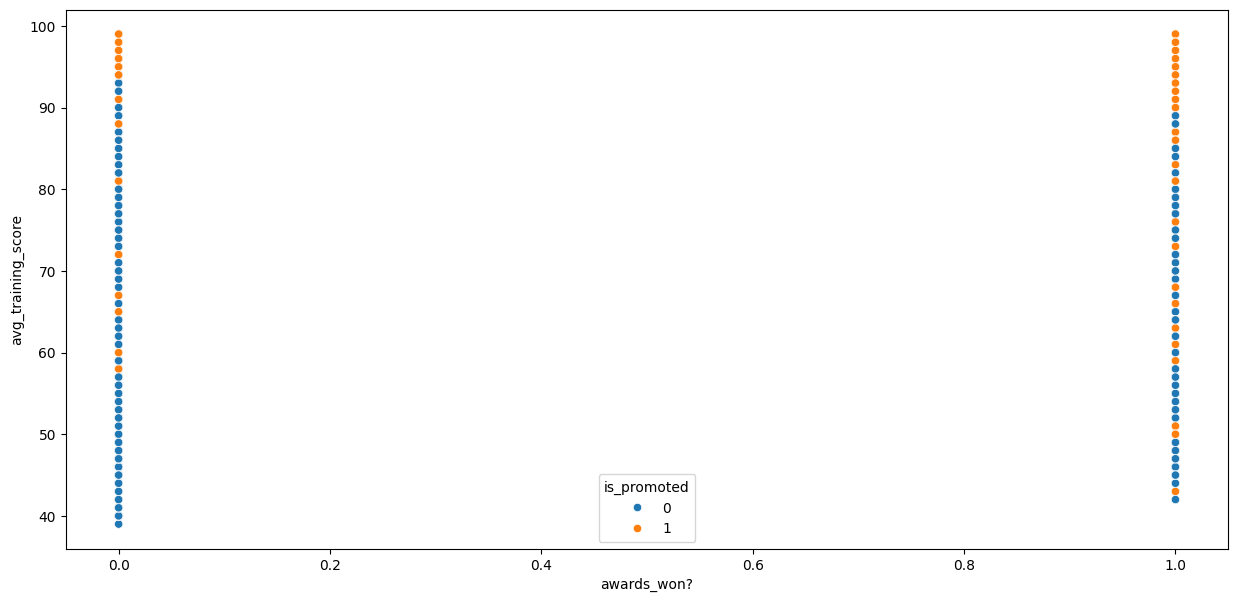

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'awards_won?', y = 'avg_training_score',data = train, hue = 'is_promoted')

In [ ]:
train.groupby('department')['is_promoted'].value_counts(normalize=True)

department         is_promoted
Analytics          0              0.904335
                   1              0.095665
Finance            0              0.918770
                   1              0.081230
HR                 0              0.943755
                   1              0.056245
Legal              0              0.948989
                   1              0.051011
Operations         0              0.909852
                   1              0.090148
Procurement        0              0.903614
                   1              0.096386
R&D                0              0.930931
                   1              0.069069
Sales & Marketing  0              0.927969
                   1              0.072031
Technology         0              0.892407
                   1              0.107593
Name: proportion, dtype: float64

In [ ]:
train.groupby('education')['is_promoted'].value_counts(normalize=True)

education         is_promoted
Bachelor's        0              0.917969
                  1              0.082031
Below Secondary   0              0.916770
                  1              0.083230
Master's & above  0              0.901441
                  1              0.098559
Name: proportion, dtype: float64

In [ ]:
train.groupby(['education','department'])['is_promoted'].value_counts(normalize=True)

education         department         is_promoted
Bachelor's        Analytics          0              0.906234
                                     1              0.093766
                  Finance            0              0.917150
                                     1              0.082850
                  HR                 0              0.952787
                                     1              0.047213
                  Legal              0              0.947174
                                     1              0.052826
                  Operations         0              0.916849
                                     1              0.083151
                  Procurement        0              0.911678
                                     1              0.088322
                  R&D                0              0.931734
                                     1              0.068266
                  Sales & Marketing  0              0.928462
                                     1              0.071538
                  Technology         0              0.892934
                                     1              0.107066
Below Secondary   Finance            0              0.943396
                                     1              0.056604
                  HR                 0              0.929688
                                     1              0.070312
                  Legal              0              0.938462
                                     1              0.061538
                  Operations         0              0.937500
                                     1              0.062500
                  Procurement        0              0.953488
                                     1              0.046512
                  Technology         0              0.845771
                                     1              0.154229
Master's & above  Analytics          0              0.891032
                                     1              0.108968
                  Finance            0              0.913828
                                     1              0.086172
                  HR                 0              0.926330
                                     1              0.073670
                  Legal              0              0.961538
                                     1              0.038462
                  Operations         0              0.886888
                                     1              0.113112
                  Procurement        0              0.884827
                                     1              0.115173
                  R&D                0              0.930070
                                     1              0.069930
                  Sales & Marketing  0              0.917907
                                     1              0.082093
                  Technology         0              0.894353
                                     1              0.105647
Name: proportion, dtype: float64

<Axes: >

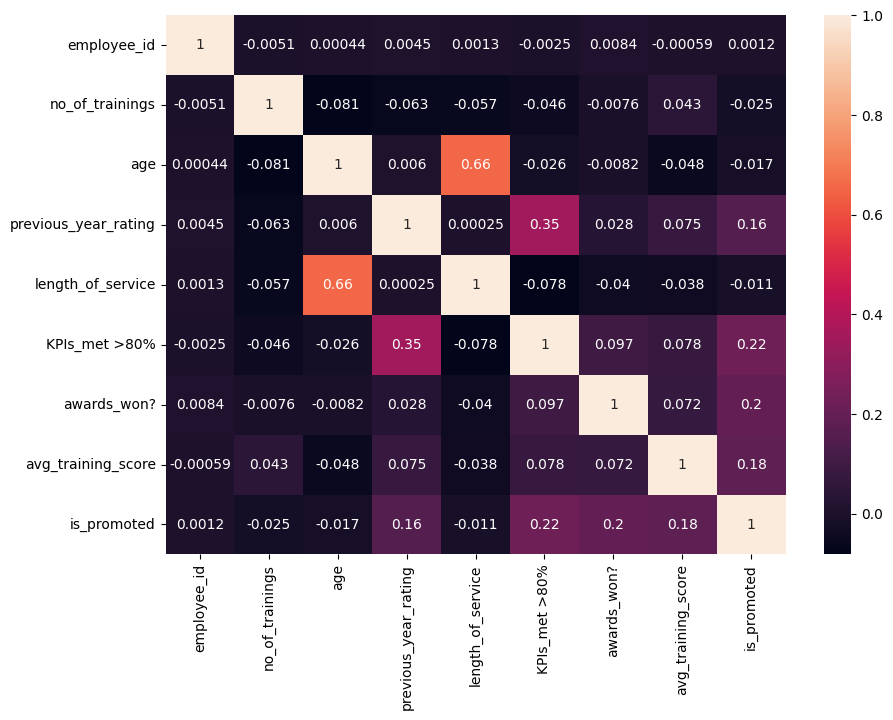

In [ ]:
plt.figure(figsize = (10, 7))
sns.heatmap(train.select_dtypes(np.number).corr(), annot = True)

In [ ]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


#Handle Missing Values

In [ ]:
train['education'].fillna(train['education'].mode()[0],inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0],inplace=True)

In [ ]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


#Feature–Target Split

In [ ]:
X=train.drop(['employee_id', 'is_promoted'], axis=1)
y=train[ 'is_promoted']

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

#Preprocessing Pipeline

In [ ]:
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())
    ]
)

In [ ]:
prepocess = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
prepocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object'))])

#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Model Building

In [ ]:
model_preprocess = Pipeline(
    steps=[
        ('prepocess', prepocess),
        ('model', LogisticRegression())
    ]
)

In [ ]:
#Train the Model
model_preprocess.fit(X, y)

Pipeline(steps=[('prepocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object'))])),
                ('model', LogisticRegression())])

In [ ]:
#Model Evaluation
y_pred = model_preprocess.predict(X_test)
y_prob = model_preprocess.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9330414158000365
Precision: 0.8205128205128205
Recall: 0.2740899357601713
F1 Score: 0.41091492776886035
ROC AUC: 0.8756340917807014

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10028
           1       0.82      0.27      0.41       934

    accuracy                           0.93     10962
   macro avg       0.88      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962



#Predictions for Submission

In [ ]:
test['education'].fillna(train['education'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0],inplace=True)

final_predictions = model_preprocess.predict(test.drop('employee_id', axis=1))

submission = pd.DataFrame({
    'employee_id': test['employee_id'],
    'is_promoted': final_predictions
})

submission.to_csv("submission.csv", index=False)

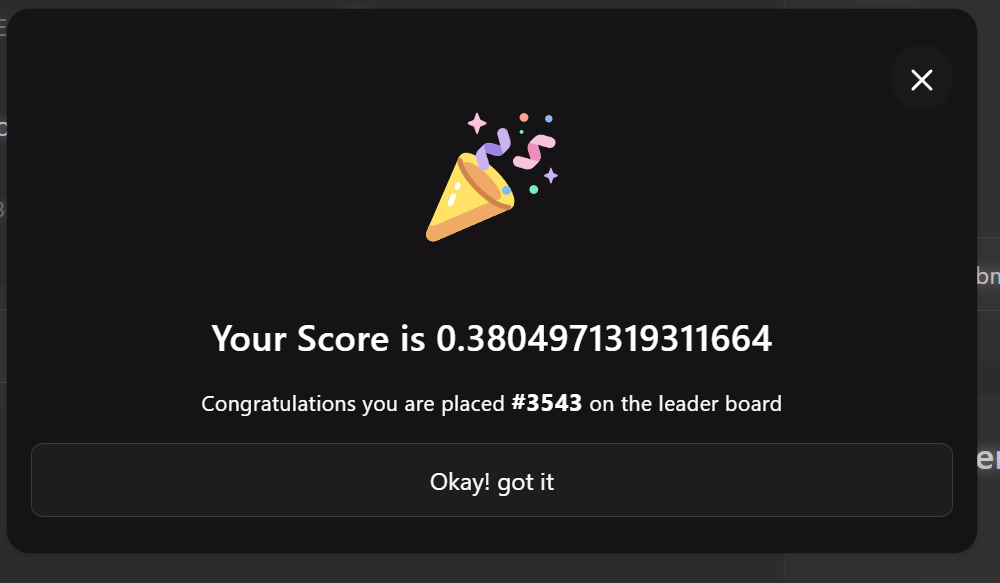

# Same Steps for Random Forest and XGBOOST

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocessor', prepocess),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest F1 Score:", f1_score(y_test, rf_pred))
print("Random Forest ROC AUC:", roc_auc_score(y_test, rf_prob))


Random Forest F1 Score: 0.33241583739148844
Random Forest ROC AUC: 0.8627126166647733


In [ ]:
test['education'].fillna(train['education'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0],inplace=True)

final_predictions = rf_model.predict(test.drop('employee_id', axis=1))

submission = pd.DataFrame({
    'employee_id': test['employee_id'],
    'is_promoted': final_predictions
})

submission.to_csv("submission_RF.csv", index=False)

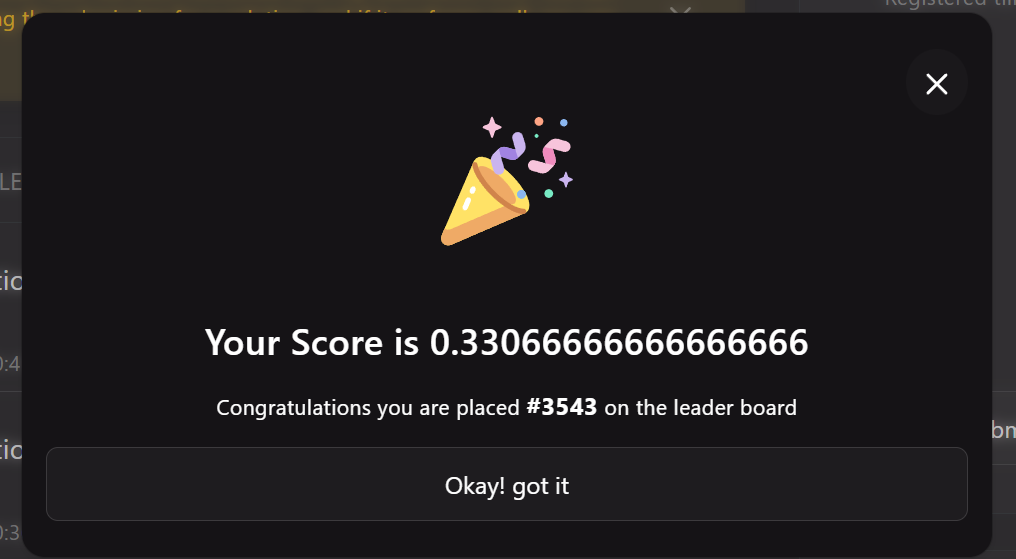

In [ ]:
from xgboost import XGBClassifier

neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
scale_pos_weight

xgb_model = Pipeline(steps=[
    ('preprocessor', prepocess),
    ('classifier', XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost Precision:", precision_score(y_test, xgb_pred))
print("XGBoost Recall:", recall_score(y_test, xgb_pred))
print("XGBoost F1 Score:", f1_score(y_test, xgb_pred))
print("XGBoost ROC AUC:", roc_auc_score(y_test, xgb_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, xgb_pred))



XGBoost Accuracy: 0.7885422368180989
XGBoost Precision: 0.2663740715732613
XGBoost Recall: 0.8447537473233405
XGBoost F1 Score: 0.40503080082135523
XGBoost ROC AUC: 0.9105171472767043

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     10028
           1       0.27      0.84      0.41       934

    accuracy                           0.79     10962
   macro avg       0.62      0.81      0.64     10962
weighted avg       0.92      0.79      0.83     10962



In [ ]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_prob >= 0.35).astype(int)

print("Tuned Recall:", recall_score(y_test, y_pred_custom))
print("Tuned F1:", f1_score(y_test, y_pred_custom))


Tuned Recall: 0.9282655246252677
Tuned F1: 0.36799660441426146


In [ ]:
test['education'].fillna(train['education'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0],inplace=True)

final_predictions = xgb_model.predict(test.drop('employee_id', axis=1))

submission = pd.DataFrame({
    'employee_id': test['employee_id'],
    'is_promoted': final_predictions
})

submission.to_csv("submission_XG.csv", index=False)

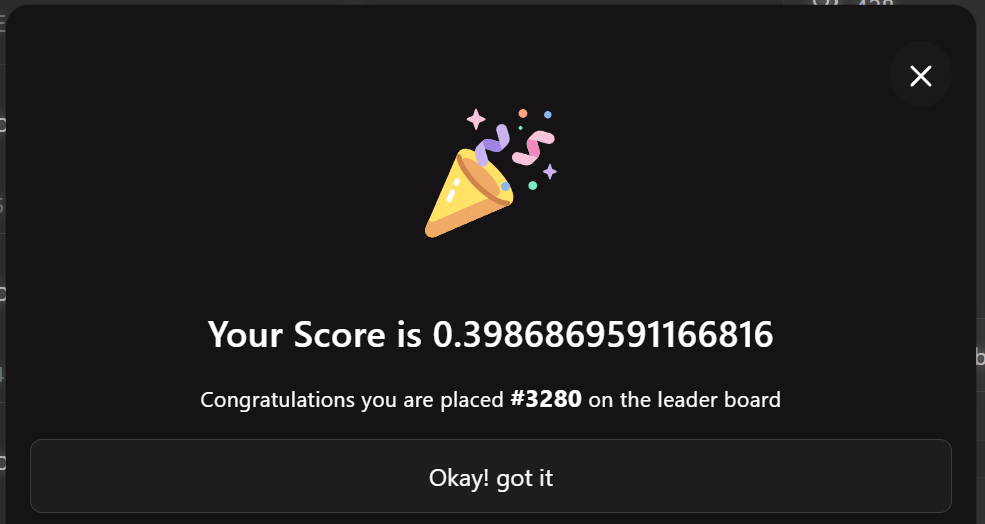

In [ ]:
def evaluate_model(model, X_test, y_test, y_prob_col=1):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, y_prob_col]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

print("Defined evaluate_model function.")

Defined evaluate_model function.


In [ ]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

print(f"Calculated scale_pos_weight: {scale_pos_weight}")

Calculated scale_pos_weight: 10.742367434386717


In [ ]:
param_1 = [
    {
        'model': [LogisticRegression(solver='liblinear', random_state=42)],
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.1, 1.0, 10.0]
    },
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10],
        'model__class_weight': ['balanced', None]
    },
    {
        'model': [XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)], # eval_metric and use_label_encoder are for suppressing warnings
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6],
        'model__learning_rate': [0.05, 0.1],
        'model__subsample': [0.7, 0.9],
        'model__colsample_bytree': [0.7, 0.9],
        'model__scale_pos_weight': [scale_pos_weight]
    }
]

print("Updated param_1 with comprehensive parameter grids.")

Updated param_1 with comprehensive parameter grids.


In [ ]:
# Initialize GridSearchCV to find the best hyperparameters for the models
# - estimator: The pipeline (model_preprocess) to tune.
# - param_grid: The dictionary of parameter grids for different models.
# - cv: Number of cross-validation folds (3).
# - scoring: Metric to optimize during tuning (ROC AUC).
# - verbose: Controls the verbosity of the output.
# - n_jobs: Number of jobs to run in parallel (-1 means using all processors).
grid_search = GridSearchCV(estimator=model_preprocess, param_grid=param_1, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data to perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("\nBest parameters found: ", grid_search.best_params_)
# Print the best ROC AUC score achieved with the best parameters
print("Best ROC AUC score found: ", grid_search.best_score_)

Fitting 3 folds for each of 46 candidates, totalling 138 fits

Best parameters found:  {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...), 'model__colsample_bytree': 0.9, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__s

In [ ]:
best_model = grid_search.best_estimator_

print("\nEvaluating the best model on the test set:")
evaluate_model(best_model, X_test, y_test)


Evaluating the best model on the test set:
Accuracy: 0.7717569786535303
Precision: 0.25283732660781844
Recall: 0.8586723768736617
F1 Score: 0.39064783244033124
ROC AUC: 0.9091706498036761

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10028
           1       0.25      0.86      0.39       934

    accuracy                           0.77     10962
   macro avg       0.62      0.81      0.63     10962
weighted avg       0.92      0.77      0.82     10962



In [ ]:
test['education'].fillna(train['education'].mode()[0], inplace=True)
test['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0], inplace=True)

final_predictions_best_model = best_model.predict(test.drop('employee_id', axis=1))

submission_best_gridsearch = pd.DataFrame({
    'employee_id': test['employee_id'],
    'is_promoted': final_predictions_best_model
})

submission_best_gridsearch.to_csv("submission_best_gridsearch.csv", index=False)

print("Submission file 'submission_best_gridsearch.csv' created successfully.")

Submission file 'submission_best_gridsearch.csv' created successfully.


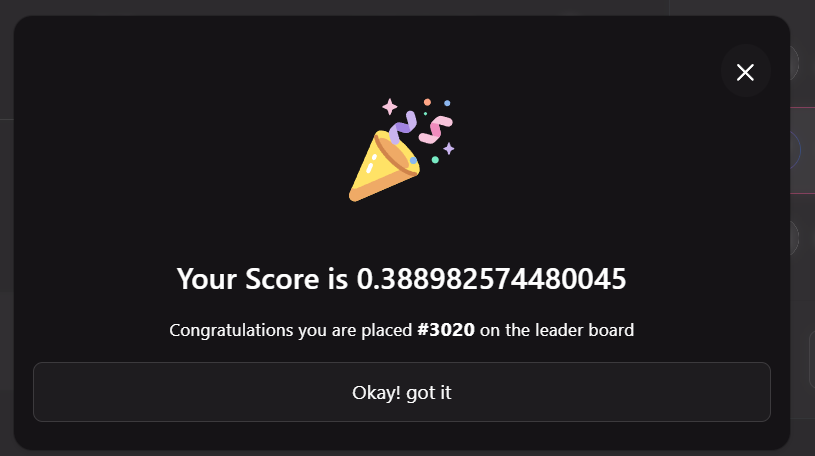

In [ ]:
import joblib

joblib.dump(best_model,'promotion_model.pkl')

['promotion_model.pkl']